In [1]:
# input feature map

import numpy as np

def preprocessing_point_cloud_data(file_path):
    x, y, z, r=np.fromfile(file_path, dtype=np.float32).reshape(-1, 4).T
    a=np.sqrt(x*x+y*y+z*z)         # radial distance                  # 3
    b=np.rad2deg(np.arctan2(y, x)) # polar angle   (horizontal angle) # 4
    c=np.rad2deg(np.arccos(z/a))   # azimuth angle (vertical angle)   # 5

    x=np.vstack([x, y, z, a, b, c, r]).T

    # horizontal line grouping to [-45º, 45º)
    x=x[(45>x[:, 4])&(x[:, 4]>=-45)]
    # vertical line grouping to [min(x), max(x))
    c_max, c_min=max(x[:, 5]), min(x[:, 5])

    # horizontal grouping
    tmp=np.linspace(-45, 45 , 180+1)
    x=np.array([x[(tmp[i+1]>x[:, 4])&(x[:, 4]>=tmp[i])] for i in range(180)])
    # vertical grouping
    tmp=np.linspace(c_min, c_max, 64+1)
    x=np.array([[j[(tmp[i+1]>j[:, 5])&(j[:, 5]>=tmp[i])] for i in range(64)] for j in x])

    # sampling
    x=np.array([[np.concatenate([i[np.argmin(i[:, 3])], i[np.argmax(i[:, 3])]]) if len(i)>0 else np.array([-1]*14) for i in j]for j in x])
    
    # Interpolation
    for i in range(180):
        for j in range(64):
            if(np.all(x[i][j]==np.array([-1]*14))):
                tmp=np.array([0.]*14)
                count=0
                if(j+1<64): count, tmp=count+1, tmp+x[i][j+1]
                if(j-1>=0): count, tmp=count+1, tmp+x[i][j-1]
                x[i][j]=tmp/count
                
    return x

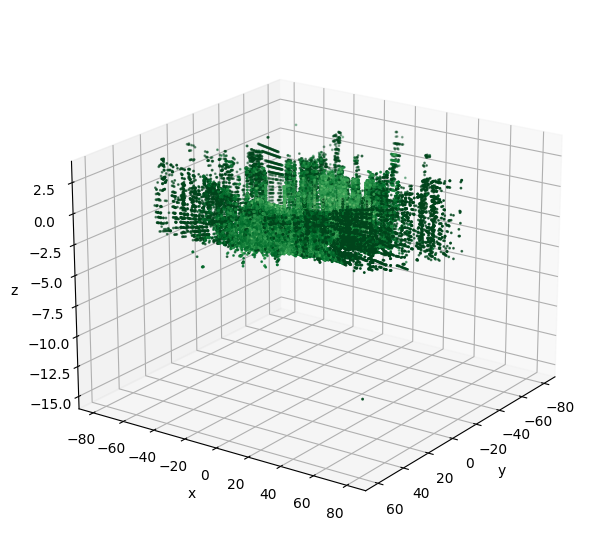

In [2]:
import numpy as np
import matplotlib.pyplot as plt

bin_path=r'.\data_road\training\velodyne\um_000049.bin'
x, y, z, r=np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4).T

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# ax.axis('off')
ax.scatter(y, x, z, c=r, cmap='Greens_r', s=1)
ax.view_init(elev=20, azim=35)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
plt.show()

0


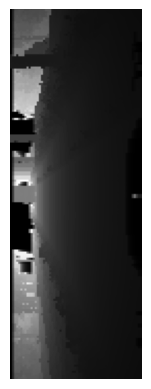

1


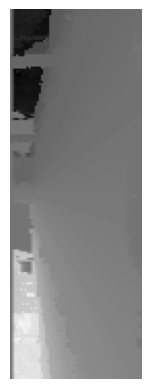

2


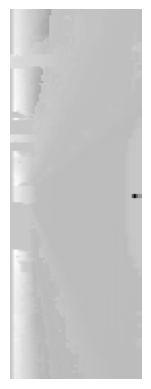

3


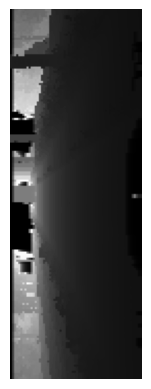

4


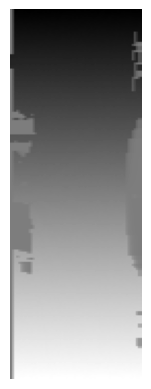

5


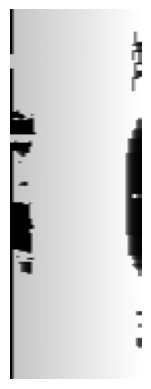

6


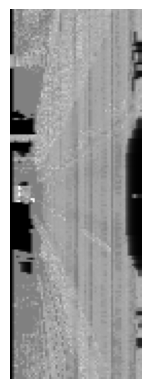

7


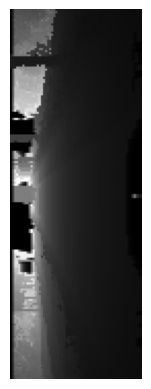

8


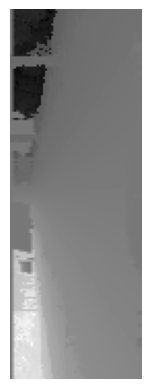

9


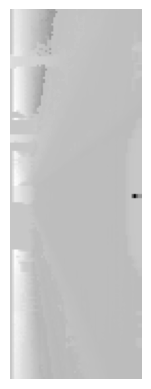

10


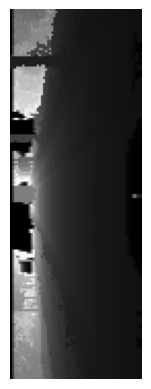

11


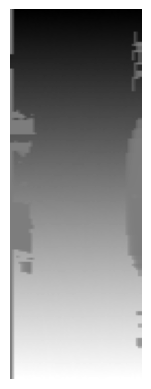

12


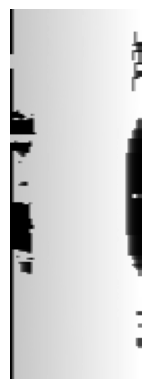

13


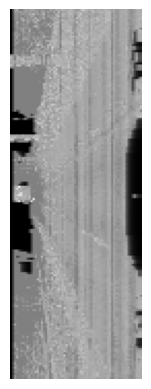

In [3]:
import matplotlib.pyplot as plt

bin_path=r'.\data_road\training\velodyne\um_000049.bin'
input_feature_map=preprocessing_point_cloud_data(bin_path)

for i in range(14):
    print(i)
    plt.imshow(input_feature_map[:, :, i], cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# input feature map

import numpy as np

def preprocessing_point_cloud_data(file_path):
    x, y, z, r=np.fromfile(file_path, dtype=np.float32).reshape(-1, 4).T
    a=np.sqrt(x*x+y*y+z*z)         # radial distance                  # 3
    b=np.rad2deg(np.arctan2(y, x)) # polar angle   (horizontal angle) # 4
    c=np.rad2deg(np.arccos(z/a))   # azimuth angle (vertical angle)   # 5
                
    return a, b, c, r

import numpy as np
import matplotlib.pyplot as plt

bin_path=r'.\data_road\training\velodyne\um_000049.bin'
# x, y, z, r=np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4).T
x, y, z, r = preprocessing_point_cloud_data(bin_path)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# ax.axis('off')
ax.scatter(y, x, z, c=r, cmap='Greens_r', s=1)
ax.view_init(elev=20, azim=35)
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_zlabel('z')
plt.show()